<a href="https://colab.research.google.com/github/sethanimesh/Image_Classifiers/blob/main/Damaged_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q fastai duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.5 MB/s eta 0:00:00


In [3]:
!pip install duckduckgo_search

In [4]:

from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *

def search_images(term, max_images=200): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [5]:
car_types = ['cars', 'damaged cars']
path = Path('Car')

In [6]:
from fastdownload import download_url

for c in car_types:
    dest = (path/c)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{c} photo'))
    resize_images(path/c, max_size=400, dest=path/c)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
fns = get_image_files(path)
fns

(#326) [Path('Car/damaged cars/e5028243-2556-479b-b6a7-7bf0f039046e.jpg'),Path('Car/damaged cars/325a508c-db28-429f-912a-f699c263975d.jpg'),Path('Car/damaged cars/c0b7f70c-e57a-4fcd-8e9f-6571e0366c0e.jpg'),Path('Car/damaged cars/fe230487-b025-49a2-b214-3bccfec1fd1e.jpg'),Path('Car/damaged cars/82c572e4-84eb-4eb8-a955-bc998f1b5ffa.jpg'),Path('Car/damaged cars/ec8c4306-cf81-4749-a1c1-e9750a715842.jpg'),Path('Car/damaged cars/8059fb81-0253-4ec3-a682-b39d708cd8e3.jpg'),Path('Car/damaged cars/3e55ab71-fc77-46f9-bcb5-f734ac007de9.JPEG'),Path('Car/damaged cars/eb2607b4-d126-49eb-85dd-7a94351d7d8c.jpg'),Path('Car/damaged cars/0cd06f63-decd-43eb-8c90-820883071001.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#22) [Path('Car/damaged cars/e5028243-2556-479b-b6a7-7bf0f039046e.jpg'),Path('Car/damaged cars/77449ce6-85ac-40c8-959b-6e3acc991e87.jpg'),Path('Car/damaged cars/ff606369-aa33-4686-84ee-cf8a765fedbb.jpg'),Path('Car/damaged cars/c2c46aaa-aebe-4618-93b2-6510e9511aad.jpg'),Path('Car/damaged cars/08b33d6b-6930-45b5-a31f-d275e99df7d6.jpg'),Path('Car/damaged cars/5b9d11a2-26d6-4783-b650-c33797276289.jpg'),Path('Car/damaged cars/1ebbe930-4a43-4618-9ea2-8530dc3ad955.jpg'),Path('Car/damaged cars/d9f2bc1a-9077-4547-a003-ec2cb142fb5a.jpg'),Path('Car/damaged cars/b177057d-cc83-443a-b4e2-9b7923f6291e.jpg'),Path('Car/damaged cars/a4850fad-e36f-4e20-89e9-52c9d774ec78.jpg')...]

In [9]:
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [10]:
cars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [11]:
dls = cars.dataloaders(path)

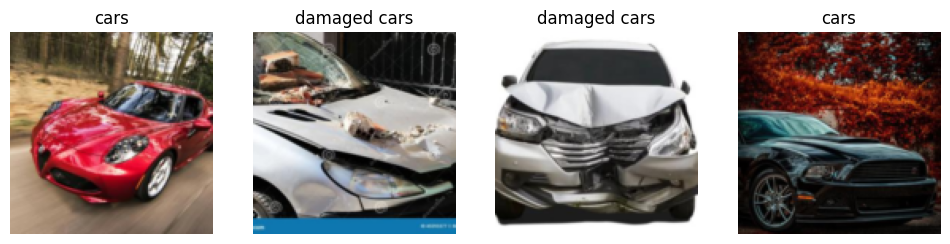

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
cars = cars.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = cars.dataloaders(path)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 197MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.893145,1.010065,0.350000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.556794,0.311333,0.116667,00:01
1,0.360613,0.071270,0.033333,00:01
2,0.263807,0.017613,0.000000,00:02
3,0.215952,0.013383,0.000000,00:01


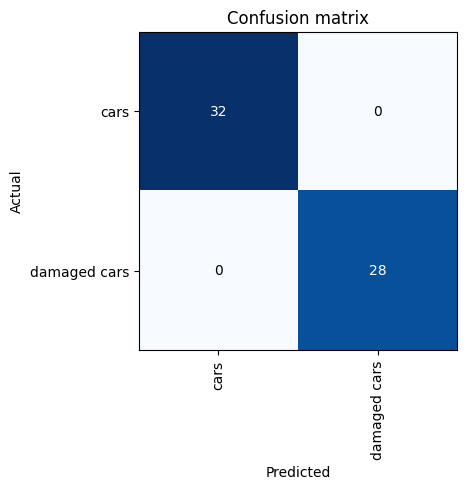

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

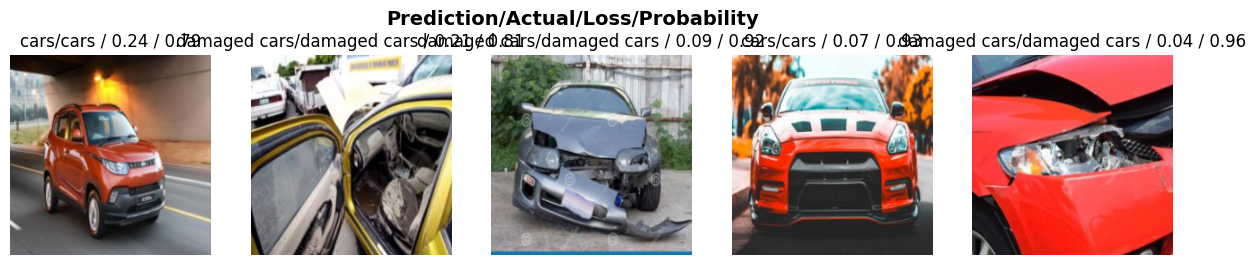

In [16]:
interp.plot_top_losses(5, nrows=1)

In [18]:
cleaner = ImageClassifierCleaner(learn)
cleaner